In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '724a425e-1e76-47d4-8484-e588f19d728a',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\natal\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9988,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.929955e+07,1.929955e+07,NaN,1,NaN,NaN,None,2023-02-23T08:42:00.000Z,24436.134104,2.821268e+10,-12.1318,0.103291,2.155918,-0.806443,5.911853,45.120057,48.673610,4.716064e+11,42.4337,5.131588e+11,None,2023-02-23T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:44:24.677141
1,1027,Ethereum,ETH,ethereum,6493,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-02-23T08:42:00.000Z,1669.439148,8.946821e+09,-2.4066,0.239299,2.408834,-0.848772,2.006359,36.797094,41.379375,2.042957e+11,18.3819,2.042957e+11,None,2023-02-23T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:44:24.677141
2,825,Tether,USDT,tether,48125,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.059060e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-02-23T08:42:00.000Z,1.000131,4.110059e+10,-11.4843,0.003607,-0.003220,-0.006947,-0.003533,0.016762,0.062934,7.059986e+10,6.3513,7.315137e+10,None,2023-02-23T08:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-23 08:44:24.677141
3,1839,BNB,BNB,bnb,1195,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578966e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-02-23T08:42:00.000Z,312.479154,4.899506e+08,-16.9848,-0.141086,2.455769,-2.590064,-1.449798,27.465973,5.820315,4.933939e+10,4.4370,4.999040e+10,None,2023-02-23T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:44:24.677141
4,3408,USD Coin,USDC,usd-coin,10286,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.217255e+10,4.217255e+10,NaN,5,NaN,NaN,None,2023-02-23T08:42:00.000Z,0.999950,4.233236e+09,-3.9745,-0.011099,0.015803,-0.016610,-0.015073,-0.003656,-0.015888,4.217046e+10,3.7932,4.217046e+10,None,2023-02-23T08:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-23 08:44:24.677141
5,52,XRP,XRP,xrp,889,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,None,2023-02-23T08:42:00.000Z,0.396800,1.057053e+09,-2.6214,0.119731,2.248341,-0.864056,-6.847179,13.763840,-3.079579,2.021732e+10,1.8181,3.967999e+10,None,2023-02-23T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:44:24.677141
6,2010,Cardano,ADA,cardano,658,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.465378e+10,3.550287e+10,NaN,7,NaN,NaN,None,2023-02-23T08:42:00.000Z,0.393104,3.349749e+08,-19.8991,-0.141154,3.358346,-3.274706,2.925637,51.871732,26.652883,1.362256e+10,1.2257,1.768970e+10,None,2023-02-23T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:44:24.677141
7,3890,Polygon,MATIC,polygon,592,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,NaN,NaN,None,2023-02-23T08:42:00.000Z,1.397452,6.420756e+08,-23.1755,0.201769,5.349728,2.727288,35.310391,75.460788,68.098379,1.220579e+10,1.0982,1.397452e+10,None,2023-02-23T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:44:24.677141
8,4687,Binance USD,BUSD,binance-usd,6274,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.194468e+10,1.194468e+10,NaN,9,NaN,NaN,None,202

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda prompt to change this to allow to pull data
#If that didn't work try using the local host URL as shown in command prompt
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\natal\OneDrive\Documents\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\natal\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\natal\OneDrive\Documents\Python Scripts\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\natal\OneDrive\Documents\Python Scripts\API.csv')

In [6]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\natal\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\natal\AppData\Local\Temp\ipykernel_13096\3246443224.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)
C:\Users\natal\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


API Runner completed


KeyboardInterrupt: 

In [7]:
df72 = pd.read_csv(r'C:\Users\natal\OneDrive\Documents\Python Scripts\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9988,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.929955e+07,1.929955e+07,NaN,1,NaN,NaN,NaN,2023-02-23T08:46:00.000Z,24438.548114,2.814416e+10,-12.0236,0.154519,2.242457,-0.855797,5.895090,45.119386,48.673915,4.716530e+11,42.4378,5.132095e+11,NaN,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
1,1,1027,Ethereum,ETH,ethereum,6493,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-02-23T08:46:00.000Z,1669.848431,8.915212e+09,-2.4285,0.309780,2.527103,-0.895847,1.992093,36.827091,41.417792,2.043458e+11,18.3864,2.043458e+11,NaN,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
2,2,825,Tether,USDT,tether,48125,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,7.059060e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-02-23T08:46:00.000Z,1.000133,4.097602e+10,-11.3431,0.004425,-0.003589,-0.005766,-0.003797,0.015591,0.064019,7.059995e+10,6.3554,7.315146e+10,NaN,2023-02-23T08:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-23 08:47:25.491947
3,3,1839,BNB,BNB,bnb,1195,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578966e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-02-23T08:46:00.000Z,312.417658,4.884438e+08,-16.9370,-0.109119,2.610038,-2.762245,-1.502675,27.429489,5.820804,4.932968e+10,4.4392,4.998057e+10,NaN,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
4,4,3408,USD Coin,USDC,usd-coin,10286,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.217255e+10,4.217255e+10,NaN,5,NaN,NaN,NaN,2023-02-23T08:46:00.000Z,1.000031,4.222449e+09,-4.1030,0.000782,0.021895,0.003165,0.006178,0.002427,-0.008790,4.217384e+10,3.7967,4.217384e+10,NaN,2023-02-23T08:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-23 08:47:25.491947
5,5,52,XRP,XRP,xrp,889,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,NaN,2023-02-23T08:46:00.000Z,0.396868,1.055602e+09,-2.3826,0.177889,2.321190,-0.921793,-6.946523,13.783893,-3.156616,2.022080e+10,1.8197,3.968682e+10,NaN,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
6,6,2010,Cardano,ADA,cardano,658,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.465378e+10,3.550287e+10,NaN,7,NaN,NaN,NaN,2023-02-23T08:46:00.000Z,0.393150,3.339453e+08,-19.5152,-0.086753,3.503571,-3.419367,2.885613,51.940848,26.662850,1.362415e+10,1.2259,1.769177e+10,NaN,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
7,7,3890,Polygon,MATIC,polygon,592,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,NaN,NaN,NaN,2023-02-23T08:46:00.000Z,1.396570,6.393082e+08,-22.8620,0.211670,5.448386,2.487586,35.349971,75.383161,68.058713,1.219808e+10,1.0975,1.396570e+10,NaN,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
8,8,4687,Binance USD,BUSD,binance-usd,6274,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,1.194468e+10,1.194468e+10,NaN,9,NaN,NaN

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9988,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.929955e+07,1.929955e+07,NaN,1,NaN,NaN,None,2023-02-23T08:46:00.000Z,24438.548114,2.814416e+10,-12.0236,0.154519,2.242457,-0.855797,5.895090,45.119386,48.673915,4.716530e+11,42.4378,5.132095e+11,None,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
1,1027,Ethereum,ETH,ethereum,6493,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-02-23T08:46:00.000Z,1669.848431,8.915212e+09,-2.4285,0.309780,2.527103,-0.895847,1.992093,36.827091,41.417792,2.043458e+11,18.3864,2.043458e+11,None,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
2,825,Tether,USDT,tether,48125,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.059060e+10,7.314177e+10,NaN,3,NaN,NaN,None,2023-02-23T08:46:00.000Z,1.000133,4.097602e+10,-11.3431,0.004425,-0.003589,-0.005766,-0.003797,0.015591,0.064019,7.059995e+10,6.3554,7.315146e+10,None,2023-02-23T08:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-23 08:47:25.491947
3,1839,BNB,BNB,bnb,1195,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578966e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-02-23T08:46:00.000Z,312.417658,4.884438e+08,-16.9370,-0.109119,2.610038,-2.762245,-1.502675,27.429489,5.820804,4.932968e+10,4.4392,4.998057e+10,None,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
4,3408,USD Coin,USDC,usd-coin,10286,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.217255e+10,4.217255e+10,NaN,5,NaN,NaN,None,2023-02-23T08:46:00.000Z,1.000031,4.222449e+09,-4.1030,0.000782,0.021895,0.003165,0.006178,0.002427,-0.008790,4.217384e+10,3.7967,4.217384e+10,None,2023-02-23T08:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-23 08:47:25.491947
5,52,XRP,XRP,xrp,889,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,None,2023-02-23T08:46:00.000Z,0.396868,1.055602e+09,-2.3826,0.177889,2.321190,-0.921793,-6.946523,13.783893,-3.156616,2.022080e+10,1.8197,3.968682e+10,None,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
6,2010,Cardano,ADA,cardano,658,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.465378e+10,3.550287e+10,NaN,7,NaN,NaN,None,2023-02-23T08:46:00.000Z,0.393150,3.339453e+08,-19.5152,-0.086753,3.503571,-3.419367,2.885613,51.940848,26.662850,1.362415e+10,1.2259,1.769177e+10,None,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
7,3890,Polygon,MATIC,polygon,592,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,NaN,NaN,None,2023-02-23T08:46:00.000Z,1.396570,6.393082e+08,-22.8620,0.211670,5.448386,2.487586,35.349971,75.383161,68.058713,1.219808e+10,1.0975,1.396570e+10,None,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
8,4687,Binance USD,BUSD,binance-usd,6274,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,1.194468e+10,1.194468e+10,NaN,9,NaN,NaN,None,2023-02

In [9]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9988,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19299550.00000,19299550.00000,NaN,1,NaN,NaN,None,2023-02-23T08:46:00.000Z,24438.54811,28144159199.70911,-12.02360,0.15452,2.24246,-0.85580,5.89509,45.11939,48.67392,471652981263.10736,42.43780,513209510404.40002,None,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
1,1027,Ethereum,ETH,ethereum,6493,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,None,2023-02-23T08:46:00.000Z,1669.84843,8915212271.10333,-2.42850,0.30978,2.52710,-0.89585,1.99209,36.82709,41.41779,204345808450.68994,18.38640,204345808450.69000,None,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
2,825,Tether,USDT,tether,48125,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,70590595922.99750,73141766321.23428,NaN,3,NaN,NaN,None,2023-02-23T08:46:00.000Z,1.00013,40976022687.67165,-11.34310,0.00443,-0.00359,-0.00577,-0.00380,0.01559,0.06402,70599951228.85080,6.35540,73151459731.32001,None,2023-02-23T08:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-23 08:47:25.491947
3,1839,BNB,BNB,bnb,1195,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,157896589.41825,159979963.59043,NaN,4,NaN,NaN,None,2023-02-23T08:46:00.000Z,312.41766,488443829.32498,-16.93700,-0.10912,2.61004,-2.76224,-1.50268,27.42949,5.82080,49329682624.13010,4.43920,49980565503.11000,None,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
4,3408,USD Coin,USDC,usd-coin,10286,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,42172547178.85536,42172547178.85536,NaN,5,NaN,NaN,None,2023-02-23T08:46:00.000Z,1.00003,4222449323.73798,-4.10300,0.00078,0.02189,0.00316,0.00618,0.00243,-0.00879,42173842570.35264,3.79670,42173842570.35000,None,2023-02-23T08:46:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-23 08:47:25.491947
5,52,XRP,XRP,xrp,889,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,None,2023-02-23T08:46:00.000Z,0.39687,1055601635.56402,-2.38260,0.17789,2.32119,-0.92179,-6.94652,13.78389,-3.15662,20220799025.54363,1.81970,39686823758.75000,None,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
6,2010,Cardano,ADA,cardano,658,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34653782299.50800,35502866590.52700,NaN,7,NaN,NaN,None,2023-02-23T08:46:00.000Z,0.39315,333945294.69963,-19.51520,-0.08675,3.50357,-3.41937,2.88561,51.94085,26.66285,13624146482.26931,1.22590,17691765545.34000,None,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
7,3890,Polygon,MATIC,polygon,592,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",10000000000.00000,8734317475.28493,10000000000.00000,NaN,8,NaN,NaN,None,2023-02-23T08:46:00.000Z,1.39657,639308198.47689,-22.86200,0.21167,5.44839,2.48759,35.34997,75.38316,68.05871,12198084997.67614,1.09750,13965699131.26000,None,2023-02-23T08:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-23 08:47:25.491947
8,4687,B

In [11]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.15452,2.24246,-0.85580,5.89509,45.11939,48.67392
Ethereum,0.30978,2.52710,-0.89585,1.99209,36.82709,41.41779
Tether,0.00443,-0.00359,-0.00577,-0.00380,0.01559,0.06402
BNB,-0.10912,2.61004,-2.76224,-1.50268,27.42949,5.82080
USD Coin,0.00078,0.02189,0.00316,0.00618,0.00243,-0.00879
XRP,0.17789,2.32119,-0.92179,-6.94652,13.78389,-3.15662
Cardano,-0.08675,3.50357,-3.41937,2.88561,51.94085,26.66285
Polygon,0.21167,5.44839,2.48759,35.34997,75.38316,68.05871
Binance USD,0.00643,0.00803,0.02329,0.02326,0.00465,-0.03016


In [12]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.15452
             quote.USD.percent_change_24h     2.24246
             quote.USD.percent_change_7d     -0.85580
             quote.USD.percent_change_30d     5.89509
             quote.USD.percent_change_60d    45.11939
             quote.USD.percent_change_90d    48.67392
Ethereum     quote.USD.percent_change_1h      0.30978
             quote.USD.percent_change_24h     2.52710
             quote.USD.percent_change_7d     -0.89585
             quote.USD.percent_change_30d     1.99209
             quote.USD.percent_change_60d    36.82709
             quote.USD.percent_change_90d    41.41779
Tether       quote.USD.percent_change_1h      0.00443
             quote.USD.percent_change_24h    -0.00359
             quote.USD.percent_change_7d     -0.00577
             quote.USD.percent_change_30d    -0.00380
             quote.USD.percent_change_60d     0.01559
             quote.USD.percent_change_90

In [13]:
type(df4)

pandas.core.series.Series

In [14]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.15452
            quote.USD.percent_change_24h   2.24246
            quote.USD.percent_change_7d   -0.85580
            quote.USD.percent_change_30d   5.89509
            quote.USD.percent_change_60d  45.11939
            quote.USD.percent_change_90d  48.67392
Ethereum    quote.USD.percent_change_1h    0.30978
            quote.USD.percent_change_24h   2.52710
            quote.USD.percent_change_7d   -0.89585
            quote.USD.percent_change_30d   1.99209
            quote.USD.percent_change_60d  36.82709
            quote.USD.percent_change_90d  41.41779
Tether      quote.USD.percent_change_1h    0.00443
            quote.USD.percent_change_24h  -0.00359
            quote.USD.percent_change_7d   -0.00577
            quote.USD.percent_change_30d  -0.00380
            quote.USD.percent_change_60d   0.01559
            quote.USD.percent_change_90d   0.06402
BNB         quote.USD.percent_change_1h   -0.10912
            quote.USD.percent_change_24h   2.61004
            quote.USD.percent_change_7d   -2.76224
            quote.USD.percent_change_30d  -1.50268
            quote.USD.percent_change_60d  27.42949
            quote.USD.percent_change_90d   5.82080
USD Coin    quote.USD.percent_change_1h    0.00078
            quote.USD.percent_change_24h   0.02189
            quote.USD.percent_change_7d    0.00316
            quote.USD.percent_change_30d   0.00618
            quote.USD.percent_change_60d   0.00243
            quote.USD.percent_change_90d  -0.00879
XRP         quote.USD.percent_change_1h    0.17789
            quote.USD.percent_change_24h   2.32119
            quote.USD.percent_change_7d   -0.92179
            quote.USD.percent_change_30d  -6.94652
            quote.USD.percent_change_60d  13.78389
            quote.USD.percent_change_90d  -3.15662
Cardano     quote.USD.percent_change_1h   -0.08675
            quote.USD.percent_change_24h   3.50357
            quote.USD.percent_change_7d   -3.41937
            quote.USD.percent_change_30d   2.88561
            quote.USD.percent_change_60d  51.94085
            quote.USD.percent_change_90d  26.66285
Polygon     quote.USD.percent_change_1h    0.21167
            quote.USD.percent_change_24h   5.44839
            quote.USD.percent_change_7d    2.48759
            quote.USD.percent_change_30d  35.34997
            quote.USD.percent_change_60d  75.38316
            quote.USD.percent_change_90d  68.05871
Binance USD quote.USD.percent_change_1h    0.00643
            quote.USD.percent_change_24h   0.00803
            quote.USD.percent_change_7d    0.02329
            quote.USD.percent_change_30d   0.02326
            quote.USD.percent_change_60d   0.00465
            quote.USD.percent_change_90d  -0.03016
Dogecoin    quote.USD.percent_change_1h    0.06205
            quote.USD.percent_change_24h   2.94317
            quote.USD.percent_change_7d   -3.73237
            quote.USD.percent_change_30d  -4.85142
            quote.USD.percent_change_60d  11.30021
            quote.USD.percent_change_90d   4.74626
Solana      quote.USD.percent_change_1h    0.36857
            quote.USD.percent_change_24h   4.92868
            quote.USD.percent_change_7d    3.44504
            quote.USD.percent_change_30d  -1.42264
            quote.USD.percent_change_60d 114.21569
            quote.USD.percent_change_90d  74.05742
Polkadot    quote.USD.percent_change_1h    0.01060
            quote.USD.percent_change_24h   4.82277
            quote.USD.percent_change_7d   10.72998
            quote.USD.percent_change_30d  10.05908
            quote.USD.percent_change_60d  64.59832
            quote.USD.percent_change_90d  38.27646
Shiba Inu   quote.USD.percent_change_1h    0.03567
            quote.USD.percent_change_24h   6.02762
            quote.USD.percent_change_7d   -2.39822
            quote.USD.percent_change_30d  10.22792
            quote.USD.percent_change_60d  60.57518
            quo

In [15]:
df5.count()

values    90
dtype: int64

In [16]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,values
0,0.15452
1,2.24246
2,-0.85580
3,5.89509
4,45.11939
5,48.67392
6,0.30978
7,2.52710
8,-0.89585
9,1.99209


In [17]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.15452
1,Bitcoin,quote.USD.percent_change_24h,2.24246
2,Bitcoin,quote.USD.percent_change_7d,-0.85580
3,Bitcoin,quote.USD.percent_change_30d,5.89509
4,Bitcoin,quote.USD.percent_change_60d,45.11939
5,Bitcoin,quote.USD.percent_change_90d,48.67392
6,Ethereum,quote.USD.percent_change_1h,0.30978
7,Ethereum,quote.USD.percent_change_24h,2.52710
8,Ethereum,quote.USD.percent_change_7d,-0.89585
9,Ethereum,quote.USD.percent_change_30d,1.99209


In [18]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.15452
1,Bitcoin,quote.USD.percent_change_24h,2.24246
2,Bitcoin,quote.USD.percent_change_7d,-0.85580
3,Bitcoin,quote.USD.percent_change_30d,5.89509
4,Bitcoin,quote.USD.percent_change_60d,45.11939
5,Bitcoin,quote.USD.percent_change_90d,48.67392
6,Ethereum,quote.USD.percent_change_1h,0.30978
7,Ethereum,quote.USD.percent_change_24h,2.52710
8,Ethereum,quote.USD.percent_change_7d,-0.89585
9,Ethereum,quote.USD.percent_change_30d,1.99209


In [19]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.15452
1,Bitcoin,24h,2.24246
2,Bitcoin,7d,-0.85580
3,Bitcoin,30d,5.89509
4,Bitcoin,60d,45.11939
5,Bitcoin,90d,48.67392
6,Ethereum,1h,0.30978
7,Ethereum,24h,2.52710
8,Ethereum,7d,-0.89585
9,Ethereum,30d,1.99209


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

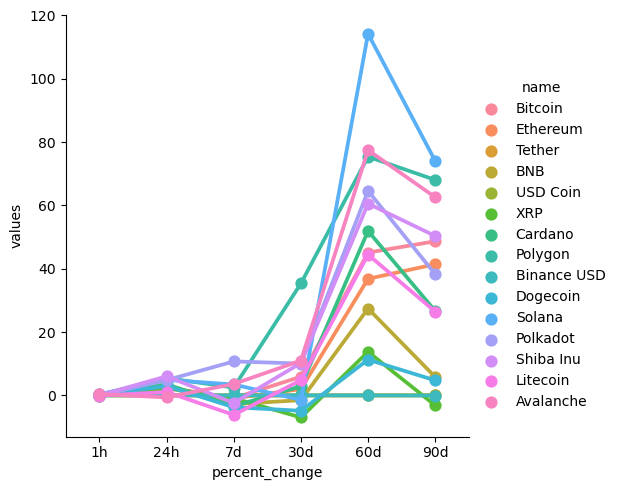

In [21]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [22]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,24438.54811,2023-02-23 08:47:25.491947


In [23]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>